<img src ='https://polycloudenvironment.blob.core.windows.net/kpmg/Alerting.png' height='200'>

**eBike360 is a Four Stage Algorithm developed for analyzing Country and State specific data**
For the hackathon purpose, we have completed 70-75% of the code and still have a long way to go for 100% accuracy as it uses regression, image/video face recognition algorithms, pattern detection and DQNs for various modules..

The model is powered for logging etc. by MLFlow
With MLflow's autologging capabilities, a single line of code automatically logs the resulting model, the parameters used to create the model, and a model score. MLflow autologging is available for several widely used machine learning packages. This notebook creates a Random Forest model on a simple dataset and uses the the MLflow `autolog()` function to log information generated by the run.

For details about what information is logged with `autolog()`, refer to the [MLflow documentation](https://mlflow.org/docs/latest/index.html).

In [0]:
# If you are running Databricks Runtime version 7.1 or above, uncomment this line and run this cell:
%pip install mlflow

Python interpreter will be restarted.
Requirement already satisfied: mlflow in /databricks/python3/lib/python3.8/site-packages (1.19.0)
Requirement already satisfied: cloudpickle in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.6.0)
Requirement already satisfied: querystring-parser in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.5)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Requirement already satisfied: sqlparse>=0.3.1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.4.1)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from mlflow) (21.0)
Requirement already satisfied: sqlalchemy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.4.22)
Requirement already satisfied: databricks-cli>=0.8.7 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.14.3)
Requirement already satisfied: Flask in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.0.1)
Requirement already satisfied: prometheus-flask-exporter in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.18.2)
Requirement already satisfied: gunicorn; platform_system != "Windows" in /databricks/python3/lib/python3.8/site-packages (from mlflow) (20.1.0)
Requirement already satisfied: protobuf>=3.7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.0)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Requirement already satisfied: gitpython>=2.1.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.1.18)
Requirement already satisfied: pyyaml>=5.1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (5.4.1)
Requirement already satisfied: alembic<=1.4.1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.4.1)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Requirement already satisfied: click>=7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (8.0.1)
Requirement already satisfied: docker>=4.0.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (5.0.0)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from querystring-parser->mlflow) (1.15.0)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas->mlflow) (2.8.1)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2020.12.5)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2.10)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->mlflow) (2.4.7)
Requirement already satisfied: greenlet!=0.4.17; python_version >= "3" in /databricks/python3/lib/python3.8/site-packages (from sqlalchemy->mlflow) (1.1.0)
Requirement already satisfied: tabulate>=0.7.7 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli>=0.8.7->mlflow) (0.8.9)
Requirement already satisfied: Werkzeug>=2.0 in /databricks/python3/lib/python3.8/site-packages (from Flask->mlflow) (2.0.1)
Requirement already satisfied: Jinja2>=3.0 in /databricks/python3/lib/python3.8/si

In [8]:
__author__ = "Team Simply Azure"
__copyright__ = "Copyright 2021, KPMG @ HackerEarth"
__credits__ = []
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Team Simply Azure"
__status__ = "KPMG - eBike360 @ HackerEarth"

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import  matplotlib.pyplot  as  plt
import os

#LOCAL File.. does not work well
#dataset   =  pd.read_csv('/dbfs/FileStore/tables/Country/ColomboPrediction.csv', header = 0,  parse_dates = True, squeeze = True)

df = pd.read_csv("BikeStatus.csv")
df1 = df[['BatteryStatus','TyrePressure']]

df1.describe()


BatteryStatus  TyrePressure
count    1055.000000   1055.000000
mean       68.027754     27.732701
std        27.911074      4.353086
min         4.940000     15.000000
25%        47.465000     29.000000
50%        76.210000     29.000000
75%        91.965000     30.000000
max       100.000000     30.000000

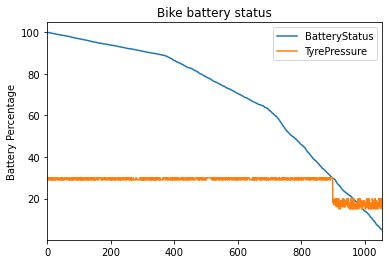

In [9]:
df1.plot()
plt.ylabel('Battery Percentage')
plt.title('Bike battery status')
plt.show()

**SIMPLE LINEAR REGRESSION**

INITIAL Rendering with Linear Regression.. 
However, the values are not as expected as the Original values are Non-Linear in nature..

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Ridge

#X = univariate_series.iloc[:, :-1].values
#y = univariate_series.iloc[:, 1].values

#dataset   =  pd.read_csv('ColomboPrediction.csv', header = 0,  parse_dates = True, squeeze = True)
#dataset.shape
### Print first five records
#dataset.head()

X = df[['SNo','BatteryStatus']]
y = df['TyrePressure']

#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#regressor = Ridge(alpha=.1)
#regressor = LogisticRegression()
regressor = LinearRegression()

regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)

#print (y_pred)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


-3.145687471115078
[0.01854656 0.31023027]


In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7323685087151592
Mean Squared Error: 5.524576628428422
Root Mean Squared Error: 2.3504417943077045


**LINEAR REGRESSION WITH SMOOTHING**

Learning with Straight Regression.. However, the values are not as expected as the Original values are Non-Linear in nature..
So found a Exponential Smoothing algorithm and found this :)

2021/11/28 10:29:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of statsmodels. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a supported version, or try upgrading MLflow.


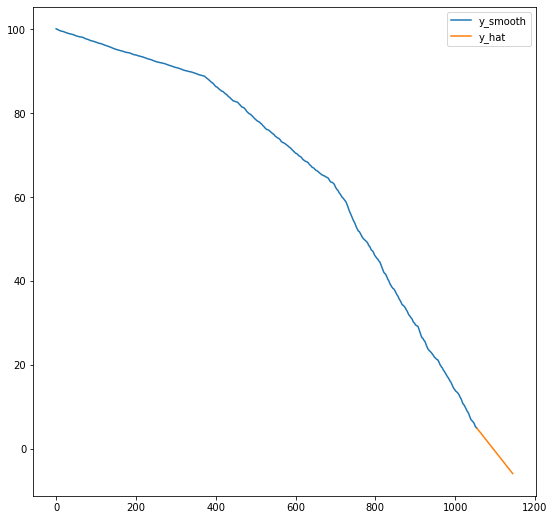

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing
#https://stackoverflow.com/questions/35192168/alternative-for-rs-exponential-smoothing-state-space-model-in-python-scikit-num
import mlflow
import mlflow.statsmodels
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Enable autolog()
# mlflow.sklearn.autolog() requires mlflow 1.11.0 or above.
mlflow.statsmodels.autolog()

# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
  x = df['SNo'].values
  y = df['BatteryStatus'].values

  # our guessed parameters
  alpha = 0.4
  beta = 0.2
  gamma = 0.01

  mlflow.log_metric("alpha", 0.4)
  mlflow.log_metric("beta", 0.2)
  mlflow.log_metric("gamma", 0.01)

  # initialise model
  ets_model = ExponentialSmoothing(y, trend='add', seasonal='add', 
  seasonal_periods=24)
  #ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_trend=beta,smoothing_seasonal=gamma)
  ets_fit = ets_model.fit(smoothing_level=alpha,smoothing_seasonal=gamma)
  # forecast p days ahead
  p_ahead = 90
  yh = ets_fit.forecast(p_ahead)

  # plot the y, y_smoothed and y_hat ts'
  #plt.plot(y, label='y')
  plt.figure(figsize=(9,9))
  plt.plot(ets_fit.fittedvalues, label='y_smooth')
  plt.plot(range(1055, 1055 + p_ahead),yh, label='y_hat')

  plt.legend()
  plt.show()

** Alerting user by sending eBike status through email **

In [14]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# creates SMTP session
s = smtplib.SMTP('smtp.gmail.com', 587)
  
# start TLS for security
s.starttls()
  
# Authentication
s.login("sahithi.thamatam.733878@gmail.com", "Infy1234567@")

msg = MIMEMultipart('alternative')
msg['Subject'] = "eBike360 - Battery Status : Critically Degraded"
msg['From'] = "sahithi.thamatam.733878@gmail.com"
msg['To'] = "spark.expedition@gmail.com"

html = """
    <html>
<body>
    <div class="row" style="justify-content:center">
        <div style=" border: none; height: 340px; width: 730px; position: absolute; left: 300px;">
            <br>
            <div class="row" align="center">
                <img src="https://consumptionstorageacc.blob.core.windows.net/test/eBikeLogo.png" style="width:140px">
            </div>

            <div class="row" style="background-color: #D64545;height:55px;text-align:center">
                <br />
                <span style="color: white; font-weight: bold; font-size: larger">Battery Status - Critically Degraded</span></>
            </div>
            <br />
            <hr style="width:560px" />
            <br />
            <div>
                <div>
                    <div class="row">
                        <label style="font-weight:bold;font-size:medium">Step 1 : </label>
                        <label>Eva sensed a critical issue</label>

                    </div>
                    <div class="row" style="text-align:center">
                        <img style="width:25%" src="https://consumptionstorageacc.blob.core.windows.net/test/batteryfailure.png" />
                    </div>
                </div>
                <br />
                <div>
                    <div class="row">
                        <label style="font-weight:bold;font-size:medium">Step 2 : </label>
                        <label>Alerted service center</label>
                    </div>
                    <div class="row">
                        <label style="margin-left:60px;">Eva has taken an action to automatically order new battery for you based on your preferences.</label>
                    </div>
                </div>
                <br /><br/>
                <div>
                    <div class="row">
                        <label style="font-weight:bold;font-size:medium">Step 3 : </label>
                        <label>Ordered new battery</label>
                    </div>
                    <br/><br/>
                    <div class="row">
                        <label style="margin-left:60px;">Order has been placed. Please collect at South Hampton service center.</label><br /><br />
                        <table>
                            <tr><td style="font-weight:bold">Order Type</td><td style="font-weight:bold"> : </td><td>Battery</td></tr><br/>
                            <tr><td style="font-weight:bold">Service Center</td><td style="font-weight:bold"> : </td><td>South Hampton</td></tr><br/>
                            <tr><td style="font-weight:bold">Date</td><td style="font-weight:bold"> : </td><td>27/11/2021 13:25</td></tr><br/>
                        </table>
                    </div>
                </div>

            </div>
        </div>
    </div>
</body>
</html>
"""
part = MIMEText(html, 'html')
msg.attach(part)
# sending the mail
s.sendmail("sahithi.thamatam.733878@gmail.com", "spark.expedition@gmail.com", msg.as_string())
  
# terminating the session
s.quit()

(221, b'2.0.0 closing connection z17sm6447790ior.22 - gsmtp')

**  To query data, simple_salesforce has a method called query_all which makes it really easy to fetch data. **<br/>
** SalesForce has their own way to write queries known as SalesForce Object Query Language. **

In [15]:
!pip install simple_salesforce


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from simple_salesforce import Salesforce
sf = Salesforce(
username='spark.expedition@gmail.com', 
password='$%^&*()', 
security_token='token')


sf_data = sf.query_all("SELECT Owner.Name, store_id__c, account_number__c, username__c, password__c, program_status__c, FROM Account WHERE program_status__c IN ('Live','Test')")


sf_df = pd.DataFrame(sf_data['records']).drop(columns='attributes')

<img src='https://polycloudenvironment.blob.core.windows.net/kpmg/SalesOrderOMS.PNG' height='200'/>